# Prepocessing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv','sep',',')

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

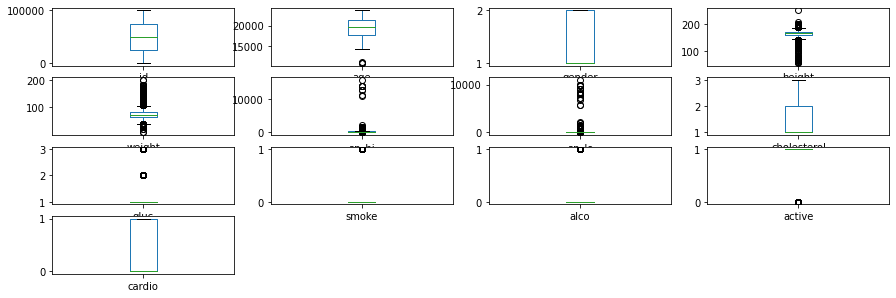

In [7]:
#Univariate Boxplots
data.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False)
plt.show()

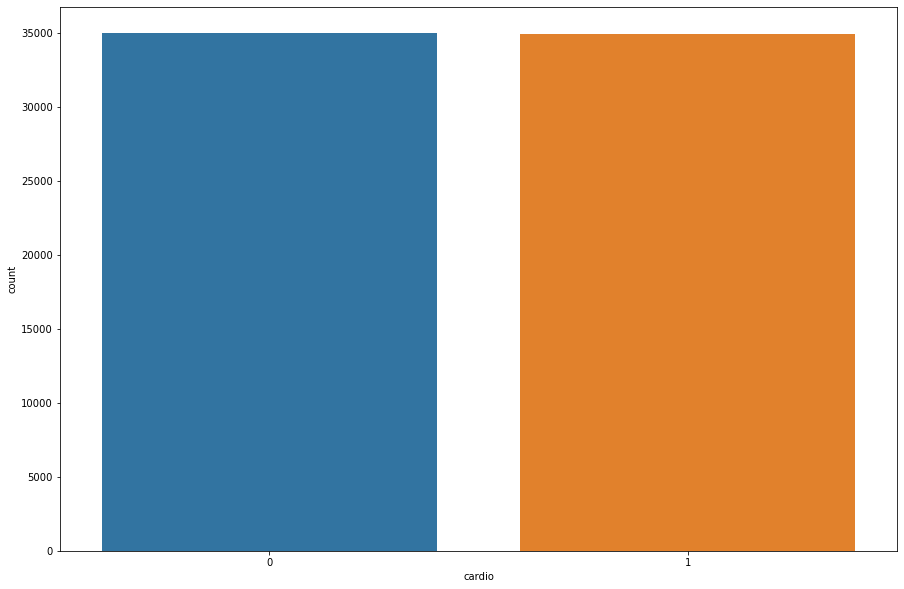

In [8]:
sns.countplot(x=data['cardio'])

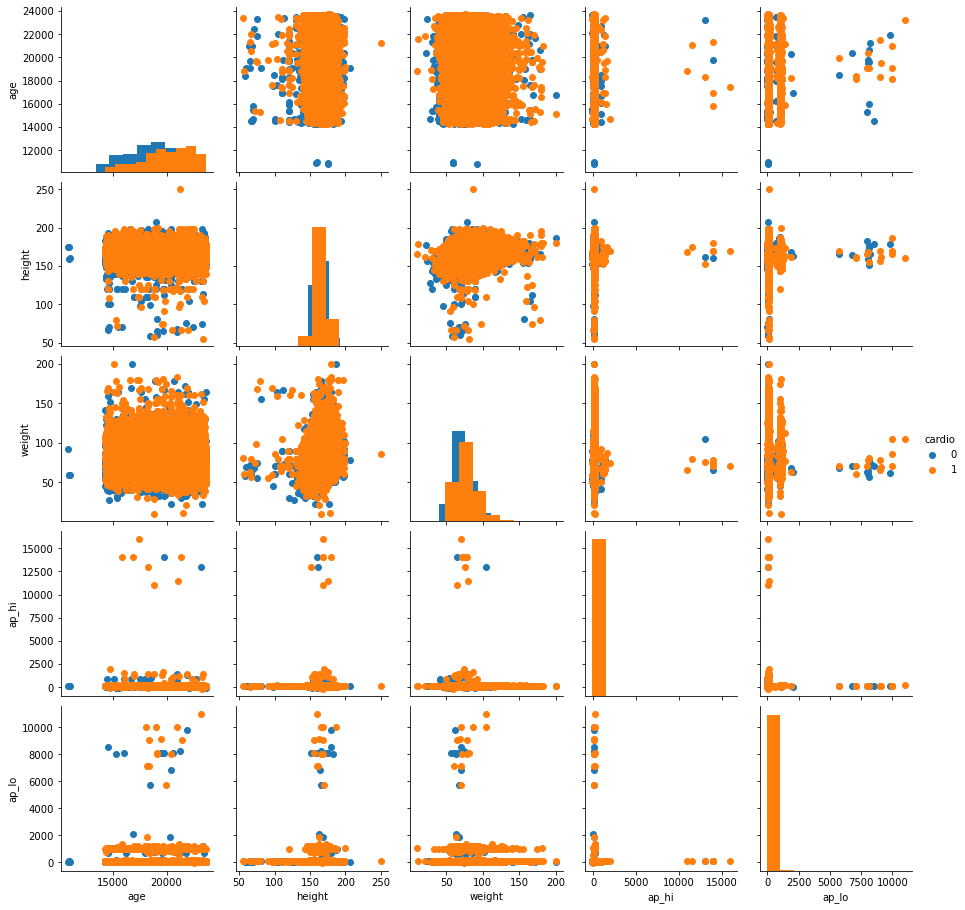

In [9]:
data1=data.drop(['id','gender','cholesterol','gluc','smoke','alco','active'],axis=1)
g=sns.PairGrid(data1,hue="cardio")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
y=data['cardio']
x=data.drop(['id','cardio'],axis=1)
k_fold = KFold(n_splits=10)
akurasi = cross_val_score(knn, x, y, cv=k_fold, scoring='accuracy')
presisi = cross_val_score(knn, x, y, cv=k_fold, scoring='precision')
recall = cross_val_score(knn, x, y, cv=k_fold, scoring='recall')
AUCScore = cross_val_score(knn, x, y, cv=k_fold, scoring='roc_auc')

In [ ]:
print (akurasi)
print (presisi)
print (recall)
print (AUCScore)

In [ ]:
print (akurasi.mean())
print (presisi.mean())
print (recall.mean())
print (AUCScore.mean())

In [ ]:
k_range = range(5,10)
k_akurasi = []
k_presisi = []
k_recall = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    akurasi =  cross_val_score(knn, x, y, cv= k_fold, scoring='accuracy')
    k_akurasi.append(akurasi.mean())
    presisi =  cross_val_score(knn, x, y, cv= k_fold, scoring='precision')
    k_presisi.append(presisi.mean())
    recall =  cross_val_score(knn, x, y, cv= k_fold, scoring='recall')
    k_recall.append(recall.mean())

In [ ]:
print (k_akurasi)
print (k_presisi)
print (k_recall)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot (k_range, k_akurasi, color='red')
plt.plot (k_range, k_presisi, color='blue')
plt.plot (k_range, k_recall, color='yellow')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Value')

# Training Testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y=data['cardio']
X=data.drop(['id','cardio'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
# nilai ketepatan klasifikasi berdasarkan data training
knn.score(X_train,y_train)

0.7778392857142857

In [17]:
y_predict= knn.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [20]:
cardio = data['cardio'].unique()
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=cardio, index=cardio)

In [21]:
conf_matrix_df

,0,1
0,4865,2177
1,2255,4703


In [22]:
akurasi=accuracy_score(y_test,y_predict)
akurasi

0.6834285714285714

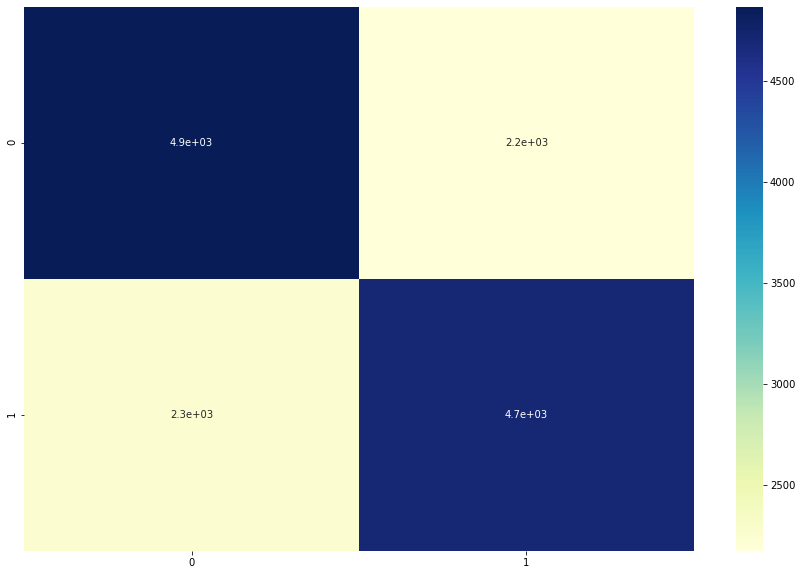

In [23]:
sns.heatmap(conf_matrix_df,annot=True,cmap="YlGnBu")
plt.show()

# Naive Bayes

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=data.drop(['id','cardio'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [26]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
nb.score(X_train, y_train)

0.5857142857142857

In [28]:
ynb_predict= nb.predict(X_test)
ynb_proba= nb.predict_proba(X_test)

In [29]:
nb_predict=nb.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [31]:
conf_matrixnb= confusion_matrix(y_test, ynb_predict)
print(conf_matrixnb)

[[6329  713]
 [5004 1954]]


In [32]:
Class= data['cardio'].unique()
conf_matrix_df= pd.DataFrame(data=conf_matrixnb, columns=Class, index=Class)
conf_matrix_df

,0,1
0,6329,713
1,5004,1954


In [33]:
akurasi=accuracy_score(y_test,nb_predict)
presisi=precision_score(y_test,nb_predict)
recalls=recall_score(y_test,nb_predict)
print(akurasi)
print(presisi)
print(recalls)

0.5916428571428571
0.7326584176977877
0.28082782408738144


In [34]:
fpr,tpr,thresholds=roc_curve(y_test,nb_predict)
auc=auc(fpr,tpr)
print('auc = ',auc)

auc =  0.5897890895500809


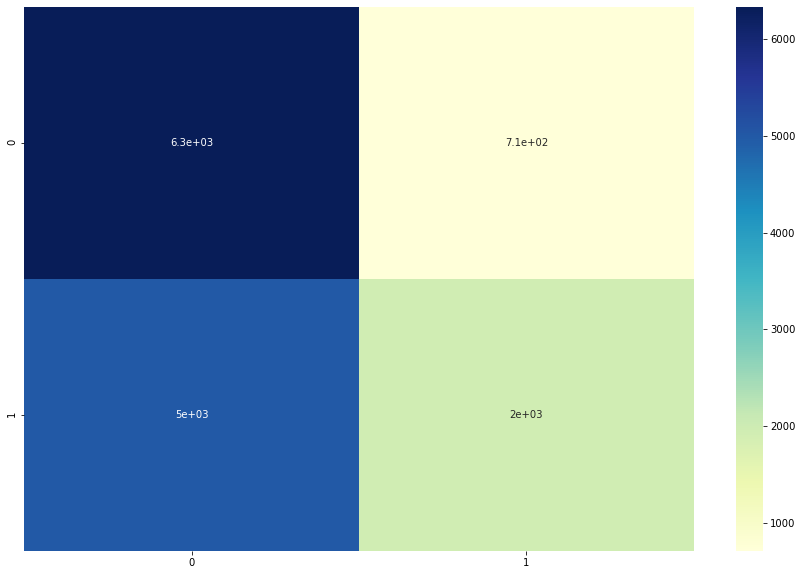

In [35]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [36]:
correlations= data.corr()
correlations

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


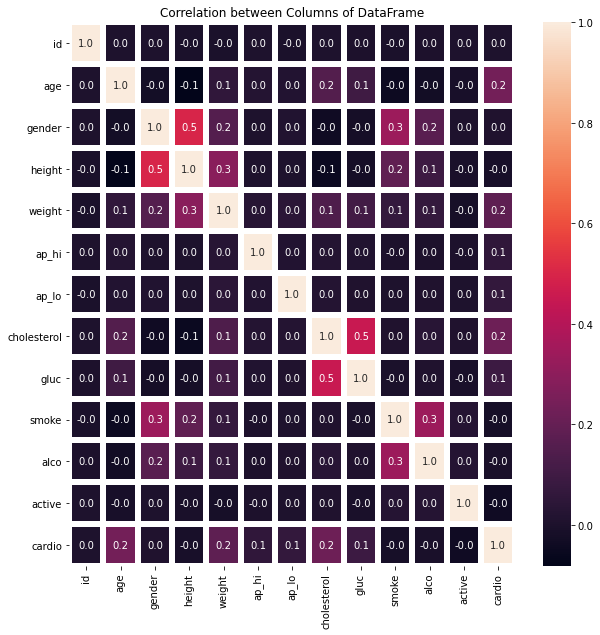

In [37]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True, linewidths=5, fmt='.1f', ax=ax)
plt.title("Correlation between Columns of DataFrame", y=1.08)
plt.show()

# Regresi Logistik

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y=data['cardio']
X=data.drop(['id','cardio'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [40]:
#REGLOG
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
model = lg.fit(X_train,y_train)

In [41]:
lg.score(X_train,y_train)

0.6968214285714286

In [42]:
lg_predict=lg.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [44]:
conf_matrixlg=confusion_matrix(y_test,lg_predict)
print(conf_matrixlg)

[[5133 1909]
 [2282 4676]]


In [45]:
Class=data['cardio'].unique()
conf_matrix_df=pd.DataFrame(data=conf_matrixlg,columns=Class,index=Class)
conf_matrix_df

,0,1
0,5133,1909
1,2282,4676


In [46]:
akurasi=accuracy_score(y_test,lg_predict)
presisi=precision_score(y_test,lg_predict)
recalls=recall_score(y_test,lg_predict)

In [47]:
print(akurasi)
print(presisi)
print(recalls)

0.7006428571428571
0.7100987091875475
0.6720321931589537


In [48]:
fpr,tpr,thresholds=roc_curve(y_test,lg_predict)
auc=auc(fpr,tpr)
print('auc = ',auc)

auc =  0.700472216999812


# Diskriminan

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
dis= LinearDiscriminantAnalysis ()
dis.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [50]:
dis.score(X_train, y_train)

0.6474642857142857

In [51]:
dis_predict=dis.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [53]:
conf_matrixdis = confusion_matrix(y_test, dis_predict)
print(conf_matrixdis)

[[4812 2230]
 [2682 4276]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [55]:
Class=data['cardio'].unique()
conf_matrix_df=pd.DataFrame(data=conf_matrixdis,columns=Class,index=Class)
conf_matrix_df

,0,1
0,4812,2230
1,2682,4276


In [56]:
akurasi=accuracy_score(y_test,dis_predict)
presisi=precision_score(y_test,dis_predict)
recalls=recall_score(y_test,dis_predict)

In [57]:
print(akurasi)
print(presisi)
print(recalls)

0.6491428571428571
0.657239471257301
0.614544409313021


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [59]:
fpr,tpr,thresholds=roc_curve(y_test,dis_predict)
auc=auc(fpr,tpr)
print('auc = ',auc)

auc =  0.6489365045713075


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [61]:
rf.score(X_train, y_train)

0.9787321428571428

In [62]:
rf_predict=rf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [64]:
conf_matrixrf= confusion_matrix(y_test, rf_predict)
print(conf_matrixrf)

[[5235 1807]
 [2373 4585]]


In [65]:
akurasi=accuracy_score(y_test,rf_predict)
presisi=precision_score(y_test,rf_predict)
recalls=recall_score(y_test,rf_predict)

print(akurasi)
print(presisi)
print(recalls)

0.7014285714285714
0.7173028785982478
0.6589537223340041


In [66]:
fpr,tpr,thresholds=roc_curve(y_test,rf_predict)
auc=auc(fpr,tpr)
print('auc = ',auc)

auc =  0.7011752423087232


# SVM

In [67]:
from sklearn import svm

In [68]:
random_state = np.random.RandomState(0)
svclin = svm.SVC(kernel='linear',probability=True,
                random_state=random_state)

In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
y=data['cardio']
X=data.drop(['id','cardio'],axis=1)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, roc_curve, recall_score

In [71]:
k_fold=StratifiedKFold(n_splits=3)

In [72]:
akurasi=cross_val_scorex(svclin,X, y, cv=k_fold, scoring='accuracy')

NameError: name 'cross_val_scorex' is not defined

In [ ]:
presisi=cross_val_score(svclin,X, y, cv=k_fold, scoring='precision')

In [ ]:
akurasi=np.array(akurasi)
presisis=np.array(presisi)
print(akurasi)
print(presisi)

In [ ]:
print(akurasi.mean())
print(presisi.mean())

In [ ]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [ ]:
random_state=np.random.RandomState(0)
n_samples, n_features=X.shape
X=np.c_[X, random_state.randn(n_samples, 200*n_features)]

cv=StratifiedKFold(n_splits=3)
classifier = svm.SVC(kernel='linear', probability=True,
                    random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=0
for train, test in cv.split(X,y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    #Compute ROC Curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test],probas_[:,1])
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr,tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC=%0.2f)'% (i, roc_auc))
    i += 1
    
plt.plot([0,1],[0,1],linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr=np.mean(tprs, axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr, mean_tpr)
std_auc=np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC=%0.2f $\pm$ %0.2f)'% (mean_auc, std_auc),
        lw=2, alpha=0.8)

std_tpr=np.std(tprs, axis=0)
tprs_upper=np.minimum(mean_tpr + std_tpr,1)
tprs_lower=np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating charachteristic example')
plt.legend(loc='lower right')
plt.show()